In [51]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib
import pandas as pd
from tensorflow import feature_column
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [52]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic_data = pd.read_csv(titanic_file)

In [53]:
titanic_data.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [54]:
#Get Label
label = titanic_data.pop('survived')

In [55]:
#Demo for feature
def demo_batch(feature_column):
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(example_batch).numpy())
example_batch = next(iter(dataset))

In [56]:
#Define Input pipeline
dataset = tf.data.Dataset.from_tensor_slices((dict(titanic_data), label))
dataset = dataset.batch(10)

In [57]:
#Define All feature
#Define numeric feature
age = feature_column.numeric_column("age")
n_siblings_spouses = feature_column.numeric_column("n_siblings_spouses")
parch = feature_column.numeric_column("parch")
fare = feature_column.numeric_column("fare")
#Define Categorical feature
sex = feature_column.categorical_column_with_vocabulary_list("sex", titanic_data['sex'].unique())
sex_one_hot = feature_column.indicator_column(sex)
ps_class = feature_column.categorical_column_with_vocabulary_list("class", titanic_data['class'].unique())
class_one_hot = feature_column.indicator_column(ps_class)
deck = feature_column.categorical_column_with_vocabulary_list("deck", titanic_data['deck'].unique())
deck_one_hot = feature_column.indicator_column(deck)
embark_town = feature_column.categorical_column_with_vocabulary_list("embark_town", titanic_data['embark_town'].unique())
embark_town_one_hot = feature_column.indicator_column(embark_town)
alone = feature_column.categorical_column_with_vocabulary_list("alone", titanic_data['alone'].unique())
alone_one_hot = feature_column.indicator_column(alone)
#Concat all Required Features
all_required_features = [age, n_siblings_spouses, parch, fare, sex_one_hot, class_one_hot, deck_one_hot, embark_town_one_hot, alone_one_hot]
feature_columns = []
for feature in all_required_features:
  feature_columns.append(feature)

In [58]:
#Define Model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.DenseFeatures(feature_columns),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
#Training
history = model.fit(dataset, epochs=30, verbose=0)

Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


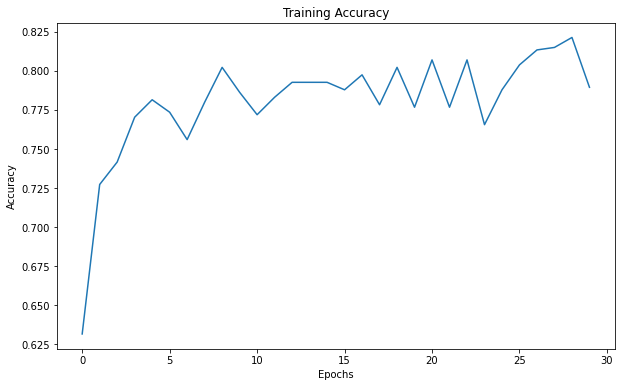

In [60]:
#Plot Accuracy
plt.figure(figsize=(10,6))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.show()

In [61]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_features_8 (DenseFeatu multiple                  0         
_________________________________________________________________
dense_21 (Dense)             multiple                  3072      
_________________________________________________________________
dropout_8 (Dropout)          multiple                  0         
_________________________________________________________________
dense_22 (Dense)             multiple                  33024     
_________________________________________________________________
dropout_9 (Dropout)          multiple                  0         
_________________________________________________________________
dense_23 (Dense)             multiple                  257       
Total params: 36,353
Trainable params: 36,353
Non-trainable params: 0
__________________________________________________